In [26]:
# This notebook is aimed to deal with the transiant state, specifically the "easy" data

In [27]:
from DataPrepocessing import *
from NeuralNets import *
from TrainMethod import *

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Some pre-defined parameters

In [28]:
sequence_length = 10
batch_size = 16

In [29]:
# first,read the data and do some data analysis

### Do the data prepocessing

In [30]:
def process(df):
    # read in a pandas frame, remove the keff_relative_uncertainty and keff_absolute_uncertainty
    # return the keff and the data columns

    df = df.drop('keff_relative_uncertainty',axis = 1)
    df = df.drop('keff_absolute_uncertainty', axis = 1)

    keff = df.pop('keff')

    # print(type(df))

    return keff, df

In [31]:
def generate_histogram(data: np.ndarray, binInt = 1.0e-06, binMax = 1.5e-04):
    '''
    Take in a data with columns are features  Transform the features with histogram method
    '''

    # Extract data
    Xvals = data

    nRows, nCols = Xvals.shape

    # define bins
    hEdges = np.arange(0, binMax+binInt, binInt)
    nBins = len(hEdges)-1


    # fill histogram matrix
    nCountsX = np.zeros((nRows, nBins), dtype=np.uint16)
    for n in range(nRows):
        nCountsX[n,:], _ = np.histogram(Xvals[n,:], hEdges)
    return nCountsX

In [32]:
'''
a reminder, shoule we remove the first column since all cs is 0?
'''

'\na reminder, shoule we remove the first column since all cs is 0?\n'

In [33]:
tracked_file = pd.read_csv('./data/cycle_990_easy.csv', index_col= 0)
tracked_file.columns

Index(['time', 'passes', 'recirculated', 'discarded', 'keff',
       'keff_relative_uncertainty', 'keff_absolute_uncertainty',
       'neutrons_per_cycle', 'power_normalization_value', 'DEM_step_increment',
       'threshold', 'time_step'],
      dtype='object')

In [34]:
power = tracked_file['power_normalization_value'] / 1e7
threshold = tracked_file['threshold'] / 72

In [35]:
def add_Power_and_Threshold(all_data, tracked_filename):

    tracked_file = pd.read_csv(tracked_filename, index_col= 0)
    
    power = tracked_file['power_normalization_value'] / 1e7
    threshold = tracked_file['threshold'] / 72
    
    power = power.to_numpy()[:-1]
    threshold = threshold.to_numpy()[:-1]
    
    
    all_data = np.insert(all_data, 0, power, axis=1)
    all_data = np.insert(all_data, 0, threshold, axis=1)
    
    return all_data

In [36]:
# combine all the above step

def get_data(filename, tracked_filename):
    df = pd.read_csv(filename, index_col= 0)

    keff, data = process(df)
    hist_data = generate_histogram(data.to_numpy())

    # delete the fist element in keff

    keff = keff.to_numpy()
    keff = keff[1:]
    # print(keff.shape)

    # delete the last row in hist_data

    hist_data = hist_data[:-1]
    # print(hist_data.shape)

    all_data = np.append(hist_data, keff.reshape(-1,1), axis=1)
    
    all_data = add_Power_and_Threshold(all_data, tracked_filename)


    all_data = all_data[: len(all_data)//sequence_length * sequence_length]



    return all_data
    


In [41]:
first_run = get_data('./data/tracked_Cs137_1035.csv', './data/cycle_1035.csv')
second_run = get_data('./data/tracked_Cs137_1306.csv','./data/cycle_1306.csv')

In [42]:
print(first_run.shape)
print(second_run.shape)

(1030, 153)
(270, 153)


In [43]:
run_data = np.concatenate([first_run, second_run], axis = 0)

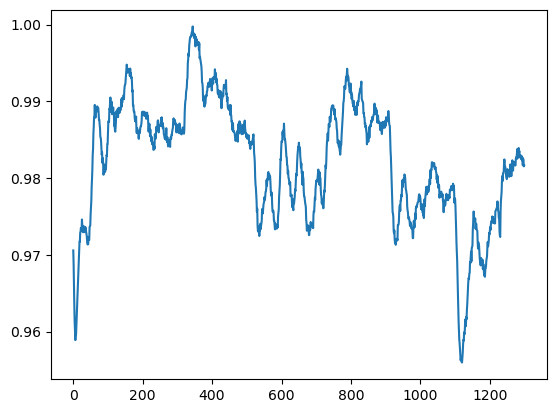

In [44]:
import matplotlib.pyplot as plt

plt.plot(run_data[:,-1])

In [ ]:
np.savetxt('challenging_run.csv', run_data, delimiter= ',')

In [ ]:
raise KeyError()